In [102]:
conda install python-graphviz

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Valeria\Anaconda3\envs\dhdsblend

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       haa95532_1         113 KB
    certifi-2021.5.30          |   py37haa95532_0         139 KB
    openssl-1.1.1l             |       h2bbff1b_0         4.8 MB
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/noarch::python-graphviz-0.16-pyhd3eb1b0_1

The following packages will be UPDATED:

  ca-certificates    conda-



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




## Modelos de Clasificación

En esta Notebook realizaremos una pequeña exploración, limpieza y visualización de un dataset y luego entrenaremos diferentes modelos a fin de comparar su perfomance.

El dataset que utilizaremos es de Pinguinos donde se las variables predictoras son distintas características de los pinguinos y la variable a predecir es si son venenosos o no. Fue descargado de Kaggle: https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

https://www.openml.org/d/42585


In [1]:
#importamos las librerías que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("penguins_size.csv")

In [3]:
#vemos los primeros 3 registros
data.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [4]:
#vemos el tamaño del dataset 

data.shape

(344, 7)

In [5]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

**species**: especies de pingüinos (Chinstrap, Adelia o Gentoo)

**culmen_length_mm**: longitud del culmen (mm)

**culmen_depth_mm**: profundidad del culmen (mm)

**flipper_length_mm**: longitud de la aleta (mm)

**body_mass_g**: masa corporal (g)

**island**: nombre de la isla (Dream, Torgersen o Biscoe) en el archipiélago de Palmer (Antártida)

**sex**: sexo pingüino

In [6]:
#vemos si hay datos nulos

data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##### Variable species (Especies): target

In [8]:
#Distribución de la variable target

data["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

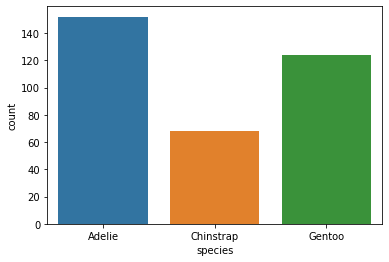

In [9]:
# visualización de variable a predecir

sns.countplot(data["species"])

##### variables numéricas

Vamos a ver las características de las variables numércias para ver si tienen sentido sus valores y sus distribuciones

In [10]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [11]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### variable culmen_length_mm

Largo de pico

In [12]:
#vemos cuales son los registros con datos nulos. Hacemos un filtro para observarlos

mask_nulos =data["culmen_length_mm"].isnull()
mask_nulos

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Name: culmen_length_mm, Length: 344, dtype: bool

In [13]:
data.loc[mask_nulos]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Se observa que los regitros que tienen nulo culmen_legth_mm también tienen nulos en culmen_depth_mm, flipper_length_mm, body_mass_g y sex por lo que se define quitar los registros utilizando el método dropna

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [14]:
# revisamos el tamaño del dataset

data.shape

(344, 7)

In [15]:
data.dropna(subset = ["culmen_length_mm"], inplace = True)


In [16]:
# revisamos el tamaño del dataset

data.shape

(342, 7)

In [17]:
# revisamos los datos nulos luego de la operación

data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

<AxesSubplot:xlabel='culmen_length_mm'>

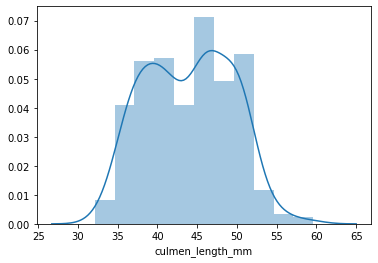

In [18]:
#Visulizamos la variable. Usamos displot porque es una variable numérica

sns.distplot(data["culmen_length_mm"])

In [19]:
sns.displot(data, x="culmen_length_mm", row="species")

AttributeError: module 'seaborn' has no attribute 'displot'

In [20]:
sns.displot(data, x="body_mass_g", row="species")

AttributeError: module 'seaborn' has no attribute 'displot'

##### Variable sex

Vamos a observar los valores nulos y qué categorías toma para ver como codificarla como variable numérica. También observaremos la relación con la variable especies

In [21]:
# Ver que categorías tomas

data["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [22]:
# Ver cuantos registros de cada cateogría

data["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [23]:
# Filtrar los valores nulos y el valor "."" para ver esos registros

mask_sex = (data["sex"].isnull()) | (data["sex"]==".")
mask_sex.sum()

9

In [24]:
data.loc[mask_sex]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [25]:
data.loc[mask_sex, ["sex"]]

,sex
8,NaN
9,NaN
10,NaN
11,NaN
47,NaN
246,NaN
286,NaN
324,NaN
336,.


In [26]:
# Vamos a imputar los valores como "MALE"

# to_replace: Selección del dataset, value= porque valor lo vamos a reemplazar

data.replace(to_replace=data.loc[mask_sex, ["sex"]], value="MALE", inplace=True)


In [27]:
# verificamos que se realizó correctamente la opreación

data["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [28]:
data["sex"].isnull().sum()

0

In [29]:
data["sex"].value_counts()

MALE      177
FEMALE    165
Name: sex, dtype: int64

<AxesSubplot:xlabel='count', ylabel='sex'>

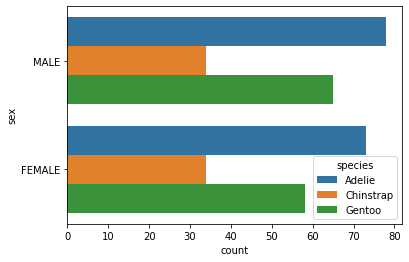

In [30]:
# Ver relación entre variable sex y la variable especie

sns.countplot(y="sex", hue="species", data=data)

In [31]:
# Convertir en variable dummie utilizando un apply y una función anonima: lambda

data["sex"] = data["sex"].apply(lambda x: 1 if x=="FEMALE" else 0)

In [32]:
data["sex"].value_counts()

0    177
1    165
Name: sex, dtype: int64

##### Variable island

In [33]:
# qué categorías puede tener

data["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [34]:
# cuántos registros de cada categoría

data["island"].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [35]:
#groupby para ver relación con variable target

data.groupby(["species", "island"])["species"].count()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     51
Chinstrap  Dream         68
Gentoo     Biscoe       123
Name: species, dtype: int64

<AxesSubplot:xlabel='count', ylabel='island'>

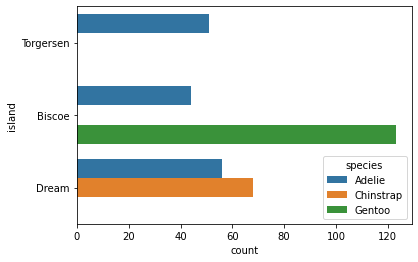

In [36]:
#Visualización para ver la relación con variable target

sns.countplot(y="island", hue="species", data=data)

In [37]:
# Dato que es una variable categórica nominal debemos convertirla en variable dummie
#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

# Argumentos por default
pd.get_dummies(data["island"])

# se puede colocar un prefjo
#pd.get_dummies(data["island"], prefix="isla")

#se puede quitar una columna
data_islas = pd.get_dummies(data["island"], prefix="isla", drop_first=True)
data_islas

,isla_Dream,isla_Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1
...,...,...
338,0,0
340,0,0
341,0,0
342,0,0


In [38]:
#unimos con join la variable dummie a nuestro dataset

data = data.join(data_islas)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isla_Dream,isla_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1,0,0


In [39]:
# eliminamos la columna "island" ya que el dato ya se encuentra en las variables dummies creada

data.drop(columns="island", inplace=True)

In [40]:
data.head(3)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isla_Dream,isla_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1


#### Revisamos que nuestro DataFrame para entrenar modelos

Tiene que estar correctamente definidas las variables y sus cateogrías

No tiene que tener valores nulos

No tiene que tener valores cateogóricos


In [41]:
data.head(3)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isla_Dream,isla_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1


In [42]:
data.isnull().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
isla_Dream           0
isla_Torgersen       0
dtype: int64

In [43]:
data.dtypes

species               object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
isla_Dream             uint8
isla_Torgersen         uint8
dtype: object

#### Generación de modelo

Vamos a utilizar distintos modelos. En primer lugar generaremos X e y y dividieremos los datos en entrenamiento y testeosifier

In [44]:
X = data.drop(columns="species")
y = data["species"]

In [99]:
# Dividimos datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)  #por default 25% de test


In [100]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (256, 7)
El tamaño de X_test es:  (86, 7)
El tamaño de y_train es:  (256,)
El tamaño de y_test es:  (86,)


#### Árbol de decisión

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClas

In [101]:
#Importamos el modelo que utilizaremos: Arbol de decisión clasificación
    
from sklearn.tree import DecisionTreeClassifier


In [102]:
#Instanciamos el modelo que utilizaremos 
arbol = DecisionTreeClassifier()

In [103]:
#Entrenamos el modelo

arbol.fit(X_train, y_train)

DecisionTreeClassifier()

##### Visualizamos el Árbol de decisión

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree


[Text(637.7142857142857, 978.48, 'culmen_depth_mm <= 206.5\ngini = 0.628\nsamples = 256\nvalue = [117, 47, 92]\nclass = Adelie'),
 Text(398.57142857142856, 761.0400000000001, 'species <= 43.35\ngini = 0.402\nsamples = 160\nvalue = [116, 43, 1]\nclass = Adelie'),
 Text(159.42857142857142, 543.6, 'species <= 42.4\ngini = 0.034\nsamples = 116\nvalue = [114, 2, 0]\nclass = Adelie'),
 Text(79.71428571428571, 326.1600000000001, 'gini = 0.0\nsamples = 107\nvalue = [107, 0, 0]\nclass = Adelie'),
 Text(239.1428571428571, 326.1600000000001, 'body_mass_g <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2, 0]\nclass = Adelie'),
 Text(159.42857142857142, 108.72000000000003, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]\nclass = Adelie'),
 Text(318.85714285714283, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Gentoo'),
 Text(637.7142857142857, 543.6, 'sex <= 0.5\ngini = 0.129\nsamples = 44\nvalue = [2, 41, 1]\nclass = Gentoo'),
 Text(558.0, 326.1600000000001, 'species <= 47.2\

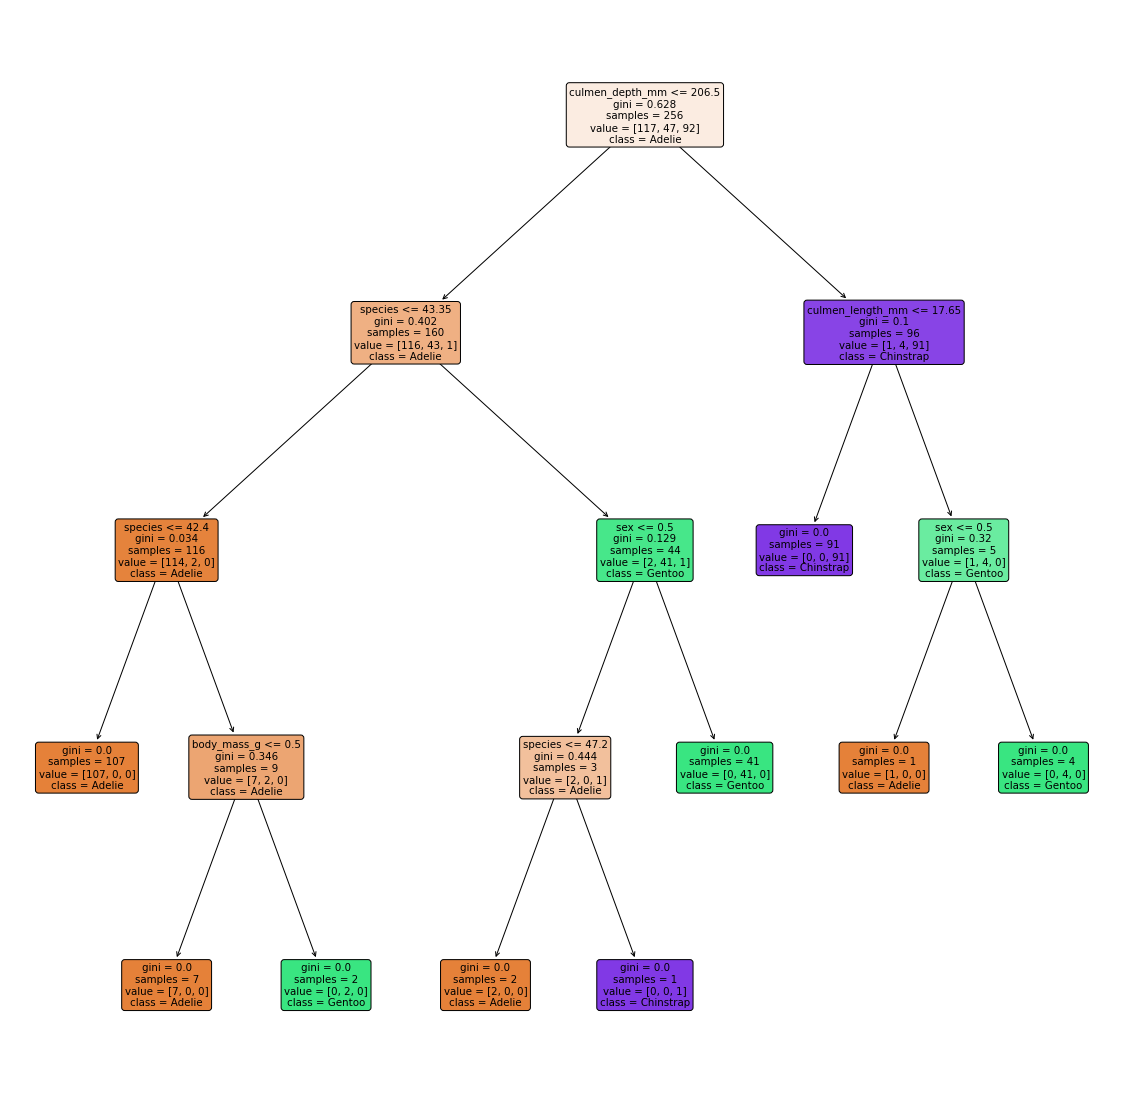

In [104]:
from IPython.display import Image
from sklearn import tree

class_names = ["Adelie", "Gentoo", "Chinstrap"]
plt.figure(figsize = (20,20))
tree.plot_tree(arbol, feature_names=data.columns[:-1],filled=True,rounded=True, class_names=class_names)


##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [105]:
#Vemos el resultado de la predicción de nuestro modelos sobre los datos utilizados para el entrenamiento

y_pred_train = arbol.predict(X_train)

In [106]:
#Utilizamos la métrica accuracy (extactitud)

from sklearn.metrics import accuracy_score

exactitud_train_arbol = accuracy_score(y_train, y_pred_train)
exactitud_train_arbol

1.0

Podemos observar que el resultado de evaluar los datos de entrenamiento es pefecta, por lo cual podemos pensar que el modelo esta sobreajustado.

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matriz de confusión y utilizando la métrica accuracy (exactitud)

In [107]:
# Probamos nuestro modelo con los datos de test

y_pred_arbol = arbol.predict(X_test)
y_pred_arbol

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Chin

In [108]:
#comparamos y_test(datos reales) con y_pred_arbol (datos predichos) para ver si el modelo hizo las predicciones correctas

# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_knn5)

from sklearn.metrics import confusion_matrix

matriz_arbol = confusion_matrix(y_test, y_pred_arbol)
matriz_arbol

array([[32,  2,  0],
       [ 1, 20,  0],
       [ 0,  0, 31]], dtype=int64)

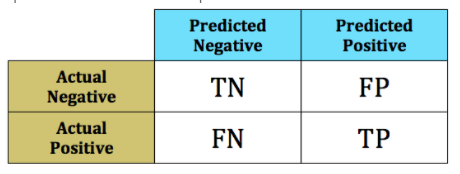

Text(33.0, 0.5, 'Etiquetas reales')

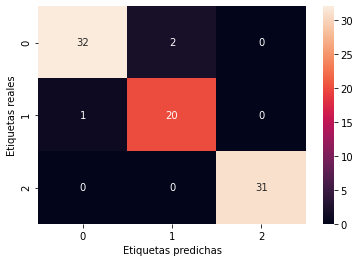

In [109]:
# Vemos la matriz de confusión en una visualización heatmap

sns.heatmap(matriz_arbol, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [110]:
#Metrica accuracy

from sklearn.metrics import accuracy_score

exactitud_arbol = accuracy_score(y_test, y_pred_arbol)
exactitud_arbol

0.9651162790697675

#### Hiperparámetro distintos

Los algoritmos de árboles de decisión tienen una tendencia al sobreajuste (overfitting). Para evitar eso es posible ajustar los distintos hiperpárametros para reducir la complejidad de los árboles, se utiliza un mecanismo denominado "poda", reduciendo el tamaño del árbol a través de limitar la profundidad máxima, limitar el número de muestrar requeridas por cada hoja o limitando el número mínimo de muestras para particionar. 

En este caso realizaremos dos modelos modificando el hiperparámetro: "max_depth"

In [111]:
#Instanciamos el modelo que utilizaremos

arbol_depth3 = DecisionTreeClassifier(max_depth=3)

In [112]:
#Entrenamos el modelo 

arbol_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(604.5, 951.3000000000001, 'culmen_depth_mm <= 206.5\ngini = 0.628\nsamples = 256\nvalue = [117, 47, 92]\nclass = Adelie'),
 Text(372.0, 679.5, 'species <= 43.35\ngini = 0.402\nsamples = 160\nvalue = [116, 43, 1]\nclass = Adelie'),
 Text(186.0, 407.70000000000005, 'species <= 42.4\ngini = 0.034\nsamples = 116\nvalue = [114, 2, 0]\nclass = Adelie'),
 Text(93.0, 135.89999999999998, 'gini = 0.0\nsamples = 107\nvalue = [107, 0, 0]\nclass = Adelie'),
 Text(279.0, 135.89999999999998, 'gini = 0.346\nsamples = 9\nvalue = [7, 2, 0]\nclass = Adelie'),
 Text(558.0, 407.70000000000005, 'sex <= 0.5\ngini = 0.129\nsamples = 44\nvalue = [2, 41, 1]\nclass = Gentoo'),
 Text(465.0, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [2, 0, 1]\nclass = Adelie'),
 Text(651.0, 135.89999999999998, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = Gentoo'),
 Text(837.0, 679.5, 'culmen_length_mm <= 17.65\ngini = 0.1\nsamples = 96\nvalue = [1, 4, 91]\nclass = Chinstrap'),
 Text(744.0, 407.7000000

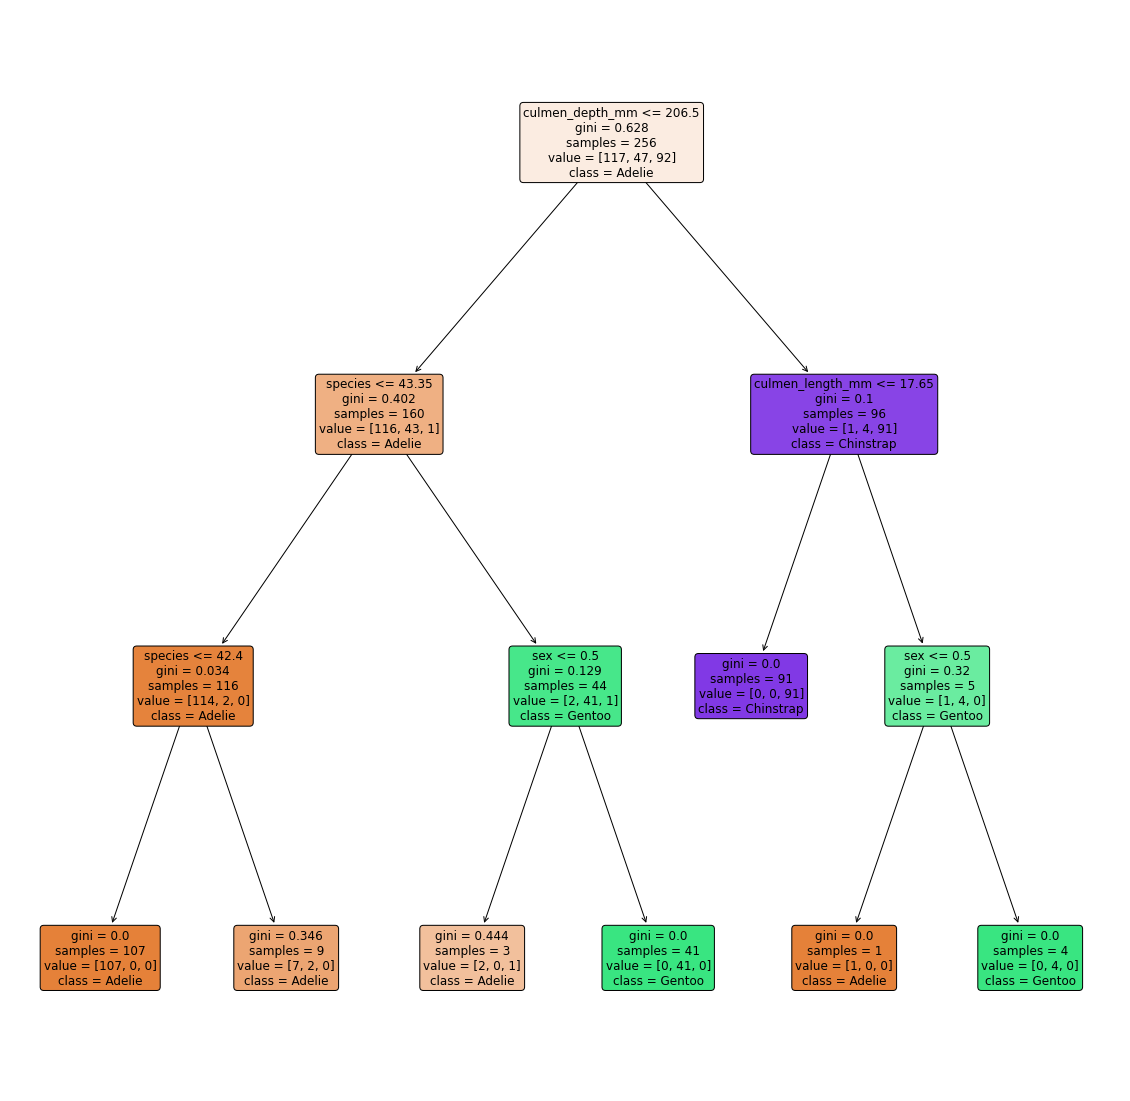

In [113]:
class_names = ["Adelie", "Gentoo", "Chinstrap"]
plt.figure(figsize = (20,20))
tree.plot_tree(arbol_depth3, feature_names=data.columns[:-1],filled=True,rounded=True, class_names=class_names)


##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [114]:
y_pred_train_depth3 = arbol_depth3.predict(X_train)
accuracy_score(y_train, y_pred_train_depth3)


0.98828125

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [115]:
# Probar nuestro modelo con los datos de test

y_pred_depth3 = arbol_depth3.predict(X_test)
y_pred_depth3

array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap'

Text(33.0, 0.5, 'Etiquetas reales')

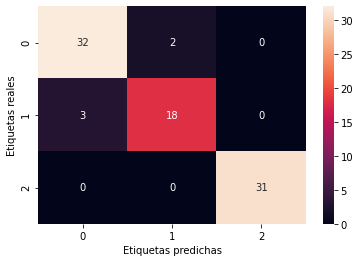

In [116]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth4)
matriz_depth3 = confusion_matrix(y_test, y_pred_depth3)
sns.heatmap(matriz_depth3, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [117]:
exactitud_depth3 = accuracy_score(y_test, y_pred_depth3)
exactitud_depth3

0.9418604651162791

In [118]:
print("La exactitud del modelo árbol de decisión", exactitud_arbol)
print("La exactitud del modelo árbol de decisión con profundidad máxima de 3 es", exactitud_depth3)

La exactitud del modelo árbol de decisión 0.9651162790697675
La exactitud del modelo árbol de decisión con profundidad máxima de 3 es 0.9418604651162791


#### Regresión logística

Entrenaremos un modelo de regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [119]:
#importamos el modelo

from sklearn.linear_model import LogisticRegression


In [120]:
#Instanciamos el modelo que utilizaremos

reg_log = LogisticRegression()

In [121]:
#Entrenamos el modelo 

reg_log.fit(X_train, y_train)

C:\Users\Valeria\Anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [122]:
# Podemos observar los coeficientes generados por nuestro modelo

reg_log.coef_

array([[-7.29062414e-01,  1.21549658e+00,  5.71813086e-02,
         3.68431876e-04, -7.16185370e-02, -5.38194663e-02,
         1.70016031e-01],
       [ 1.21196679e+00, -4.58284635e-02, -1.50228787e-01,
        -5.71724517e-03, -2.51349002e-02,  1.60481771e-01,
        -1.05839488e-01],
       [-4.82904374e-01, -1.16966812e+00,  9.30474787e-02,
         5.34881330e-03,  9.67534371e-02, -1.06662305e-01,
        -6.41765434e-02]])

##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [123]:
y_pred_rl = reg_log.predict(X_train)
accuracy_score(y_train, y_pred_rl)


0.98828125

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [124]:
# Probar nuestro modelo con los datos de test

y_pred_rl = reg_log.predict(X_test)


Text(33.0, 0.5, 'Etiquetas reales')

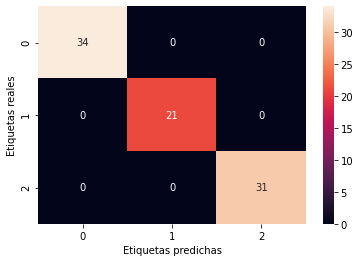

In [125]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth2)
matriz_rl = confusion_matrix(y_test, y_pred_rl)
sns.heatmap(matriz_rl, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [126]:
#accuracy

exactitud_rl = accuracy_score(y_test, y_pred_rl)
exactitud_rl

1.0

In [127]:
#Comparamos la performance de los modelos

print("La exactitud del modelo árbol de decisión", round(exactitud_arbol,2))
print("La exactitud del modelo árbol de decisión con profundidad máxima de 3 es", round(exactitud_depth3,2))
print("La exactitud del modelo regresión logística", exactitud_rl)



La exactitud del modelo árbol de decisión 0.97
La exactitud del modelo árbol de decisión con profundidad máxima de 3 es 0.94
La exactitud del modelo regresión logística 1.0


#### KNN

Entrenaremos un modelo de KNN: vecinos más cercanos con distintos hiperparámentros de cantidad de vecinos(n_neighbors)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [128]:
#importamos el modelo

from sklearn.neighbors import KNeighborsClassifier

In [129]:
#Instanciamos el modelo que utilizaremos

knn3 = KNeighborsClassifier(n_neighbors=3)

In [130]:
#Entrenamos el modelo 

knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [131]:
y_pred_knn3 = knn3.predict(X_train)
accuracy_score(y_train, y_pred_knn3)


0.875

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [132]:
# Probar nuestro modelo con los datos de test

y_pred_knn3 = knn3.predict(X_test)


Text(33.0, 0.5, 'Etiquetas reales')

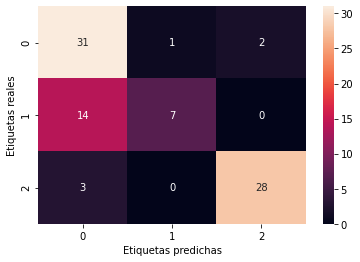

In [133]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth2)
matriz_knn3= confusion_matrix(y_test, y_pred_knn3)
sns.heatmap(matriz_knn3, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [134]:
#accuracy

exactitud_knn3 = accuracy_score(y_test, y_pred_knn3)
exactitud_knn3

0.7674418604651163

In [135]:
#Comparamos la performance de los modelos

print("La exactitud del modelo árbol de decisión", round(exactitud_arbol,2))
print("La exactitud del modelo árbol de decisión con profundidad máxima de 3 es", round(exactitud_depth3,2))
print("La exactitud del modelo regresión logística", exactitud_rl)
print("La exactitud del modelo knn con 3 vecinos más cercanos", round(exactitud_knn3,2))



La exactitud del modelo árbol de decisión 0.97
La exactitud del modelo árbol de decisión con profundidad máxima de 3 es 0.94
La exactitud del modelo regresión logística 1.0
La exactitud del modelo knn con 3 vecinos más cercanos 0.77


##### Cambiando el hiperparámetro

cantidad de vecinos (n_neighbors): 5

In [136]:
#Instanciamos el modelo que utilizaremos

knn5 = KNeighborsClassifier(n_neighbors=5)

In [137]:
#Entrenamos el modelo 

knn5.fit(X_train, y_train)

KNeighborsClassifier()

##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [138]:
y_pred_knn5 = knn5.predict(X_train)
accuracy_score(y_train, y_pred_knn5)


0.84375

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [139]:
# Probar nuestro modelo con los datos de test

y_pred_knn5 = knn5.predict(X_test)


Text(33.0, 0.5, 'Etiquetas reales')

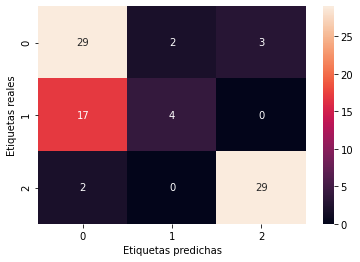

In [140]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth2)
matriz_knn5= confusion_matrix(y_test, y_pred_knn5)
sns.heatmap(matriz_knn5, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [141]:
#accuracy

exactitud_knn5 = accuracy_score(y_test, y_pred_knn5)
exactitud_knn5

0.7209302325581395

In [142]:
#Comparamos la performance de los modelos

print("La exactitud del modelo árbol de decisión", round(exactitud_arbol,2))
print("La exactitud del modelo árbol de decisión con profundidad máxima de 3 es", round(exactitud_depth3,2))
print("La exactitud del modelo regresión logística", exactitud_rl)
print("La exactitud del modelo knn con 3 vecinos más cercanos", round(exactitud_knn3,2))
print("La exactitud del modelo knn con 5 vecinos más cercanos", round(exactitud_knn5,2))



La exactitud del modelo árbol de decisión 0.97
La exactitud del modelo árbol de decisión con profundidad máxima de 3 es 0.94
La exactitud del modelo regresión logística 1.0
La exactitud del modelo knn con 3 vecinos más cercanos 0.77
La exactitud del modelo knn con 5 vecinos más cercanos 0.72


##### Estandarizaremos los datos para ver si el resultado es diferente

Importamos de la librería de Pre-procesamiento de Scikit-Learn el StandarScaler y creamos el objeto que utilizaremos 

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##### Utilizamos el metodo fit_transform sobre los datos de entrenamiento

En este caso se entrena el modelo Scaler para definir la Media y el Desvío Estandar y luego se utiliza el método *transform* para transformar los datos de entrenamiento de acuerdo a lo definido en el entrenamiento. Se realiza todo con el mismo método: *fit_transform*

In [144]:
X_train_std = scaler.fit_transform(X_train)

##### Utilizamos el metodo transform sobre los datos de testeo

In [145]:
X_test_std = scaler.transform(X_test)

##### Entrenamos y testeamos nuevamente

Utilizamos el modelo KNN con 3 vecinos más cercanos con los datos estandarizados

In [146]:
#Instanciamos el modelo que utilizaremos

knn3_sca = KNeighborsClassifier(n_neighbors=3)

In [147]:
#Entrenamos el modelo con los datos de X_train escalados

knn3_sca.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Evaluación de datos de train

Podemos utilizar una métrica de evaluación para ver la performance del modelo con los datos de entrenamiento

In [148]:
y_pred_knn3_sca = knn3_sca.predict(X_train_std)
accuracy_score(y_train, y_pred_knn3_sca)


0.99609375

##### Probamos y evaluamos nuestro modelo

Utilizamos el metodo predict para probar nuestro modelo con los datos de test. Luego comparamos la predicciones de nuestro modelo con el resultado real a través de una matrix de confusión y utilizando la métrica accuracy (exactitud)

In [149]:
# Probar nuestro modelo con los datos de test

y_pred_knn3_sca = knn3_sca.predict(X_test_std)


Text(33.0, 0.5, 'Etiquetas reales')

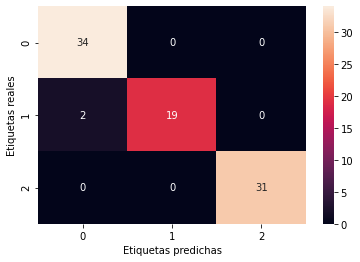

In [150]:
# Matriz de confusión:comparando resultado original (y_test) con predicción del modelo (y_pred_depth2)
matriz_knn3_sca= confusion_matrix(y_test, y_pred_knn3_sca)
sns.heatmap(matriz_knn3_sca, annot=True)
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")

In [151]:
#accuracy

exactitud_knn3_sca = accuracy_score(y_test, y_pred_knn3_sca)
exactitud_knn3_sca

0.9767441860465116

In [153]:
#Comparamos la performance de los modelos

print("La exactitud del modelo árbol de decisión", round(exactitud_arbol,2))
print("La exactitud del modelo árbol de decisión con profundidad máxima de 3 es", round(exactitud_depth3,2))
print("La exactitud del modelo regresión logística", exactitud_rl)
print("La exactitud del modelo knn con 3 vecinos más cercanos", round(exactitud_knn3,2))
print("La exactitud del modelo knn con 5 vecinos más cercanos", round(exactitud_knn5,2))
print("La exactitud del modelo knn con 3 vecinos más cercanos con datos estandarizados", round(exactitud_knn3_sca,2))



La exactitud del modelo árbol de decisión 0.97
La exactitud del modelo árbol de decisión con profundidad máxima de 3 es 0.94
La exactitud del modelo regresión logística 1.0
La exactitud del modelo knn con 3 vecinos más cercanos 0.77
La exactitud del modelo knn con 5 vecinos más cercanos 0.72
La exactitud del modelo knn con 3 vecinos más cercanos con datos estandarizados 0.98
